In [1]:
# imports
import pandas as pd
from keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import numpy as np

from sklearn import metrics
import matplotlib.pyplot as plt

2022-12-04 01:46:44.278972: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# read in data
test_df = pd.read_csv('/Users/taylor/Desktop/DS340W/term_project/data/wisconsin/wisconsin_test.csv')
test_dataset = test_df.values

test_X = test_dataset[:,0:30].astype(float)
test_Y = test_dataset[:,30]

# encode class values as integers
encoder = LabelEncoder()

encoder.fit(test_Y)
encoded_test_Y = encoder.transform(test_Y)

In [3]:
# Reconstruct models
baseNetDrop = models.load_model('/Users/taylor/Desktop/DS340W/term_project/models/baseNetDrop')
smallNetDrop = models.load_model('/Users/taylor/Desktop/DS340W/term_project/models/smallNetDrop')
bigNet5Drop = models.load_model('/Users/taylor/Desktop/DS340W/term_project/models/bigNet5Drop')
bigNet7Drop = models.load_model('/Users/taylor/Desktop/DS340W/term_project/models/bigNet7Drop')
bigNet10Drop = models.load_model('/Users/taylor/Desktop/DS340W/term_project/models/bigNet10Drop')
bigNet15Drop = models.load_model('/Users/taylor/Desktop/DS340W/term_project/models/bigNet15Drop')

2022-12-04 01:47:53.073065: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# baseNet prediction
pred = np.round(baseNetDrop.predict(test_X)[:10],0)
pred = [int(i) for i in pred]

label = encoded_test_Y[:10]
label = [int(i) for i in label]

6/6 [==============================] - 0s 2ms/step


In [5]:
print(pred) 
print(label)

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0]
[0, 1, 1, 0, 0, 1, 1, 1, 0, 0]


In [6]:
# smallNet prediction
pred = np.round(smallNetDrop.predict(test_X)[:10],0)
pred = [int(i) for i in pred]

6/6 [==============================] - 0s 2ms/step


In [7]:
print(pred) 
print(label)

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0]
[0, 1, 1, 0, 0, 1, 1, 1, 0, 0]


In [8]:
# bigNet5 prediction
pred = np.round(bigNet5Drop.predict(test_X)[:10],0)
pred = [int(i) for i in pred]

6/6 [==============================] - 0s 2ms/step


In [9]:
print(pred) 
print(label)

[1, 1, 1, 0, 0, 1, 1, 1, 1, 0]
[0, 1, 1, 0, 0, 1, 1, 1, 0, 0]


In [10]:
# bigNet7 prediction
pred = np.round(bigNet7Drop.predict(test_X)[:10],0)
pred = [int(i) for i in pred]

6/6 [==============================] - 0s 3ms/step


In [11]:
print(pred) 
print(label)

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0]
[0, 1, 1, 0, 0, 1, 1, 1, 0, 0]


In [12]:
# bigNet10 prediction
pred = np.round(bigNet10Drop.predict(test_X)[:10],0)
pred = [int(i) for i in pred]

6/6 [==============================] - 0s 2ms/step


In [13]:
print(pred) 
print(label)

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0]
[0, 1, 1, 0, 0, 1, 1, 1, 0, 0]


In [14]:
# bigNet15 prediction
pred = np.round(bigNet15Drop.predict(test_X)[:10],0)
pred = [int(i) for i in pred]

6/6 [==============================] - 0s 2ms/step


In [15]:
print(pred) 
print(label)

[1, 1, 1, 0, 0, 1, 1, 1, 1, 0]
[0, 1, 1, 0, 0, 1, 1, 1, 0, 0]


In [16]:
# Plot ROC curves

In [17]:
# Baseline model

6/6 [==============================] - 0s 2ms/step


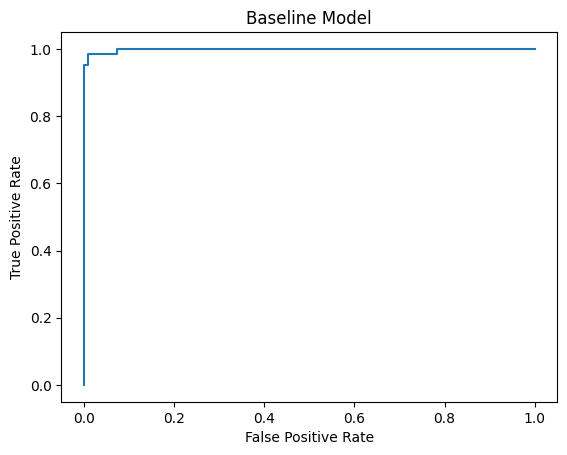

In [18]:
# define metrics
y_pred_prob = baseNetDrop.predict(test_X)
fpr, tpr, _ = metrics.roc_curve(encoded_test_Y,  y_pred_prob)

# plot ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Baseline Model')
plt.show()

In [19]:
y_pred = []

for i in y_pred_prob:
    y_pred.append(int(np.round(i,0)))
    
y_actual = pd.Series(encoded_test_Y, name='Actual')
y_predicted = pd.Series(y_pred, name='Predicted')

conf_matrix = pd.crosstab(y_actual, y_predicted)
print(conf_matrix)

Predicted    0   1
Actual            
0          107   1
1            1  62


In [20]:
# Baseline statistics:
    # Specificity = tn / (tn + fp) = 107 / (107 + 1) = 0.9907
    # Sensitivity = tp / (tp + fn) = 62 / (62 + 1) = 0.984
    # Precision = tp /(fp + tp) = 62 / (1 + 62) = 0.984
    # F-score = (2 * sensitivity * precision) / (sensitivity + precision) = (2*.984*.984) / (.984 + .984) = 0.984

In [21]:
# Small model

6/6 [==============================] - 0s 2ms/step


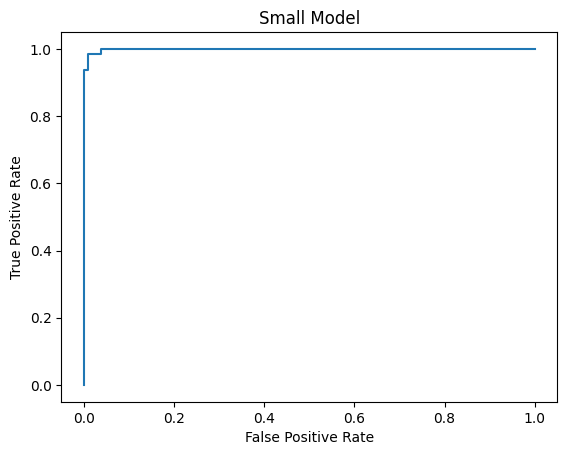

In [22]:
# define metrics
y_pred_prob = smallNetDrop.predict(test_X)
fpr, tpr, _ = metrics.roc_curve(encoded_test_Y,  y_pred_prob)

# plot ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Small Model')
plt.show()

In [23]:
y_pred = []

for i in y_pred_prob:
    y_pred.append(int(np.round(i,0)))
    
y_predicted = pd.Series(y_pred, name='Predicted')

conf_matrix = pd.crosstab(y_actual, y_predicted)
print(conf_matrix)

Predicted    0   1
Actual            
0          107   1
1            1  62


In [24]:
# Small model statistics:
    # Specificity = tn / (tn + fp) = 107 / (107 + 1) = 0.9907
    # Sensitivity = tp / (tp + fn) = 62 / (62 + 1) = 0.984
    # Precision = tp /(fp + tp) = 62 / (1 + 62) = 0.984
    # F-score = (2 * sensitivity * precision) / (sensitivity + precision) = (2*.984*.984) / (.984 + .984) = 0.984

In [25]:
# BigNet5 model

6/6 [==============================] - 0s 2ms/step


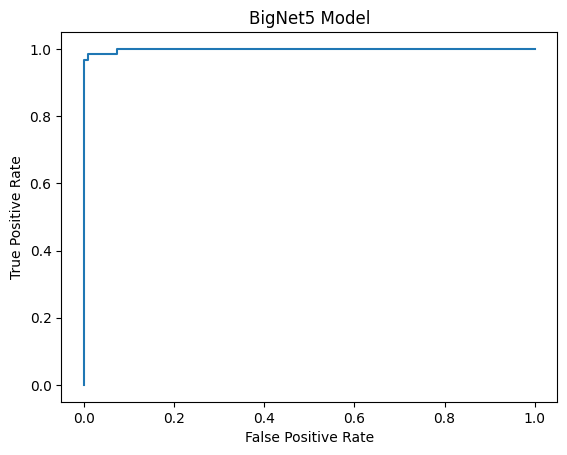

In [26]:
# define metrics
y_pred_prob = bigNet5Drop.predict(test_X)
fpr, tpr, _ = metrics.roc_curve(encoded_test_Y,  y_pred_prob)

# plot ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('BigNet5 Model')
plt.show()

In [27]:
y_pred = []

for i in y_pred_prob:
    y_pred.append(int(np.round(i,0)))
    
y_predicted = pd.Series(y_pred, name='Predicted')

conf_matrix = pd.crosstab(y_actual, y_predicted)
print(conf_matrix)

Predicted    0   1
Actual            
0          100   8
1            0  63


In [28]:
# BigNet5 model statistics:
    # Specificity = tn / (tn + fp) = 100 / (100 + 8) = 0.9259
    # Sensitivity = tp / (tp + fn) = 63 / (63 + 0) = 1
    # Precision = tp /(fp + tp) = 63 / (8 + 63) = 0.8873
    # F-score = (2 * sensitivity * precision) / (sensitivity + precision) = (2*1*.8873) / (1 + .8873) = 0.9403

In [29]:
# BigNet7 model

6/6 [==============================] - 0s 2ms/step


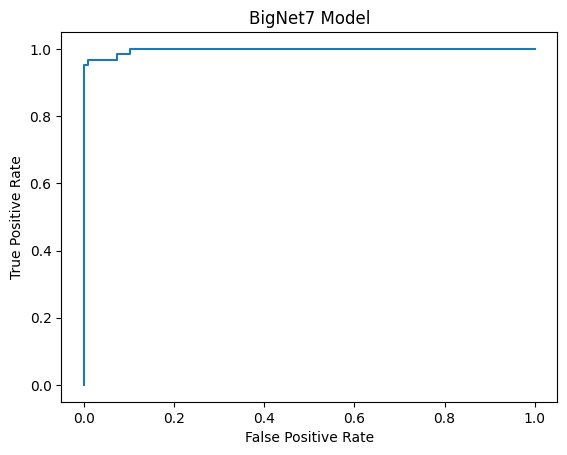

In [30]:
# define metrics
y_pred_prob = bigNet7Drop.predict(test_X)
fpr, tpr, _ = metrics.roc_curve(encoded_test_Y,  y_pred_prob)

# plot ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('BigNet7 Model')
plt.show()

In [31]:
y_pred = []

for i in y_pred_prob:
    y_pred.append(int(np.round(i,0)))
    
y_predicted = pd.Series(y_pred, name='Predicted')

conf_matrix = pd.crosstab(y_actual, y_predicted)
print(conf_matrix)

Predicted    0   1
Actual            
0          101   7
1            2  61


In [32]:
# BigNet7 model statistics:
    # Specificity = tn / (tn + fp) = 101 / (101 + 7) = 0.9352
    # Sensitivity = tp / (tp + fn) = 61 / (61 + 2) = 0.9683
    # Precision = tp /(fp + tp) = 61 / (7 + 61) = 0.8971
    # F-score = (2 * sensitivity * precision) / (sensitivity + precision) = (2*.9683*.8971) / (.9683 + .8971) = 0.9313

In [33]:
# BigNet10 model

6/6 [==============================] - 0s 3ms/step


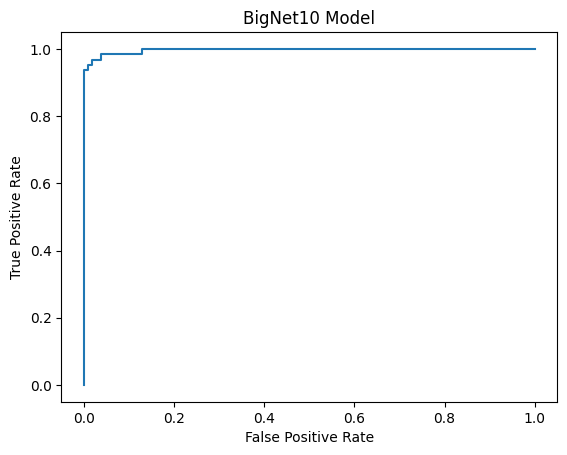

In [34]:
# define metrics
y_pred_prob = bigNet10Drop.predict(test_X)
fpr, tpr, _ = metrics.roc_curve(encoded_test_Y,  y_pred_prob)

# plot ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('BigNet10 Model')
plt.show()

In [35]:
y_pred = []

for i in y_pred_prob:
    y_pred.append(int(np.round(i,0)))
    
y_predicted = pd.Series(y_pred, name='Predicted')

conf_matrix = pd.crosstab(y_actual, y_predicted)
print(conf_matrix)

Predicted    0   1
Actual            
0          104   4
1            1  62


In [36]:
# BigNet10 model statistics:
    # Specificity = tn / (tn + fp) = 104 / (104 + 4) = 0.9630
    # Sensitivity = tp / (tp + fn) = 62 / (62 + 1) = 0.9841
    # Precision = tp /(fp + tp) = 62 / (4 + 62) = 0.9394
    # F-score = (2 * sensitivity * precision) / (sensitivity + precision) = (2*.9841*.9394) / (.9841 + .9394) = 0.9612

In [37]:
# BigNet15 model

6/6 [==============================] - 0s 3ms/step


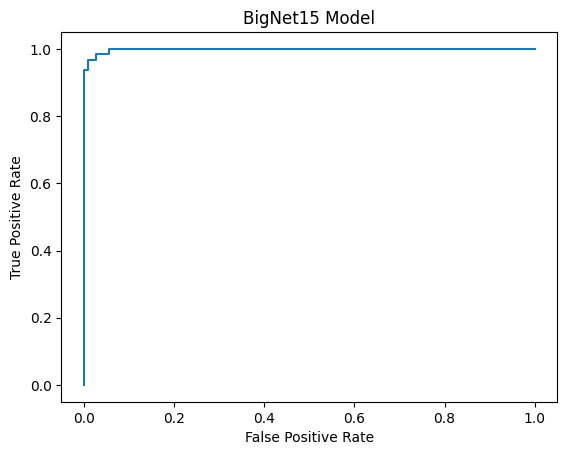

In [38]:
# define metrics
y_pred_prob = bigNet15Drop.predict(test_X)
fpr, tpr, _ = metrics.roc_curve(encoded_test_Y,  y_pred_prob)

# plot ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('BigNet15 Model')
plt.show()

In [39]:
y_pred = []

for i in y_pred_prob:
    y_pred.append(int(np.round(i,0)))
    
y_predicted = pd.Series(y_pred, name='Predicted')

conf_matrix = pd.crosstab(y_actual, y_predicted)
print(conf_matrix)

Predicted   0   1
Actual           
0          98  10
1           0  63


In [40]:
# BigNet15 model statistics:
    # Specificity = tn / (tn + fp) = 98 / (98 + 10) = 0.9074
    # Sensitivity = tp / (tp + fn) = 63 / (63 + 0) = 1
    # Precision = tp /(fp + tp) = 63 / (10 + 63) = 0.863
    # F-score = (2 * sensitivity * precision) / (sensitivity + precision) = (2*1*.863) / (1 + .863) = 0.9265